<a href="https://colab.research.google.com/github/MohamedHashimYoussef/Brain-Tumor-Diagnosis/blob/master/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

> Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others.


> Such information, if predicted well in advance, can provide important insights to doctors who can then adapt their diagnosis and treatment per patient basis.





# **Goal**

> Predict if the Patient have heart Disease or not from then given features.




# **Data**

*   **Train and validation data:**


> Contains 242 row each row consist of 13 independent features(F1 -> F13) and 1 dependent   feature (Target)


*   **Test data:**


> Contains 61 row each row consist of 13 independent features(F1 -> F13)





In [0]:
# Import Helpful Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import os
print(os.listdir("/content/drive/My Drive/Heart/"))

['heart_train.csv', 'heart_test.csv']


# **Read Data**

In [0]:
# Reading Data in DataFrame
df    = pd.read_csv('/content/drive/My Drive/Heart/heart_train.csv')

In [0]:
# Print First Five rows in Data
df.head()

,index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,target
0,1,43,0,2,122,213,1,0,165,0,0.2,2,1,0,1
1,2,66,0,2,146,278,0,0,152,1,0.0,2,1,0,1
2,3,58,0,2,140,211,0,1,165,0,0.0,2,2,1,1
3,4,63,1,0,124,197,1,0,136,0,0.0,2,1,0,0
4,5,57,0,1,154,232,0,0,164,1,0.0,2,2,1,0


In [0]:
# Delete index Colum
del df['index']

# **Data Exploration**

> Label Value ( 1 ) Maps To Have Heart Disease


> Label Value ( 0 ) Maps To Haven't Heart Disease





In [0]:
# Print Data Shape
df.shape

(242, 14)

In [0]:
# Summary Labels ( 1 -> Have Heart Disease ) , ( 0 -> Haven't Heart Disease )
df.target.value_counts()

1    131
0    111
Name: target, dtype: int64

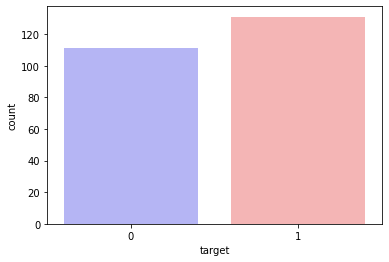

In [0]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [0]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease : {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease : {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease : 45.87%
Percentage of Patients Have Heart Disease : 54.13%


In [0]:
# Get Mean of All Features For Each Label
df.groupby('target').mean()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
target,,,,,,,,,,,,,
0,56.873874,0.558559,0.477477,134.414414,250.324324,0.477477,0.171171,139.612613,1.207207,1.599099,2.495495,1.207207,0.837838
1,53.137405,0.145038,1.381679,129.595420,243.740458,0.557252,0.129771,158.480916,0.320611,0.609160,2.114504,1.580153,0.534351


In [0]:
# Summary & Describe Data
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.851240,0.334711,0.966942,131.805785,246.760331,0.520661,0.14876,149.826446,0.727273,1.063223,2.289256,1.409091,0.673554,0.541322
std,8.944421,0.472867,1.050065,17.114924,53.471911,0.532732,0.35659,23.169116,1.030651,1.193764,0.623709,0.619530,0.469885,0.499322
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.00000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,209.250000,0.000000,0.00000,134.500000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,56.000000,0.000000,1.000000,130.000000,240.000000,1.000000,0.00000,153.000000,0.000000,0.800000,2.000000,1.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.750000,1.000000,0.00000,166.000000,1.000000,1.750000,3.000000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,2.000000,1.00000,202.000000,4.000000,6.200000,3.000000,2.000000,1.000000,1.000000


# **Preprocessing**

In [0]:
# Divide data to features and labels
X     = df.iloc[ : , : -1].values
Y     = df.iloc[ : , -1 ].values
print('Features ...')
print(X)
print('Labels ...')
print(Y)

Features ...
[[43.  0.  2. ...  2.  1.  0.]
 [66.  0.  2. ...  2.  1.  0.]
 [58.  0.  2. ...  2.  2.  1.]
 ...
 [56.  0.  3. ...  3.  1.  1.]
 [47.  0.  2. ...  2.  2.  1.]
 [58.  0.  1. ...  2.  1.  1.]]
Labels ...
[1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0]


In [0]:
# Split data to train data and test data
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size= 0.2 , random_state = 0)

In [0]:
# Scale Data using Standard Scaler 
sc                = StandardScaler()
x_train_scaled    = sc.fit_transform(x_train)
x_test_scaled     = sc.transform(x_test)
print('X Train after scaling ...')
print(x_train_scaled)
print('X Test after scaling ...')
print(x_test_scaled)


X Train after scaling ...
[[ 1.78477852 -0.74595684  0.07600029 ... -0.45398479  1.002017
  -1.5070456 ]
 [-1.25558789  1.34056013  1.05387064 ... -0.45398479  1.002017
   0.66354993]
 [-1.25558789 -0.74595684  1.05387064 ... -0.45398479  1.002017
   0.66354993]
 ...
 [ 0.32089839  1.34056013 -0.90187007 ...  1.05668875 -0.63687521
   0.66354993]
 [-0.46734475  1.34056013  1.05387064 ...  1.05668875  1.002017
   0.66354993]
 [ 0.32089839 -0.74595684 -0.90187007 ...  1.05668875 -0.63687521
   0.66354993]]
X Test after scaling ...
[[ 0.32089839 -0.74595684 -0.90187007 -0.07695441 -0.89745468  0.93820532
  -0.42900942 -0.7348438  -0.74371819 -0.42005681 -0.45398479 -0.63687521
  -1.5070456 ]
 [ 1.44696003 -0.74595684 -0.90187007  0.76487078 -0.97094943  0.93820532
   2.33095116 -0.31224292  1.18296115  1.93714672  1.05668875 -0.63687521
   0.66354993]
 [-0.9177694  -0.74595684  1.05387064 -0.07695441  0.13147183  0.93820532
  -0.42900942  1.29364039 -0.74371819 -0.92517185 -0.45398479  1.

# **PCA**

In [0]:
# Import PCA Script
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_scaled)
print(pca.explained_variance_ratio_)

[0.20196917 0.12516468 0.09706434 0.09275149 0.07710689 0.07087477
 0.06587343 0.06336241 0.05505584 0.05043196 0.03785801 0.03455703
 0.02792998]


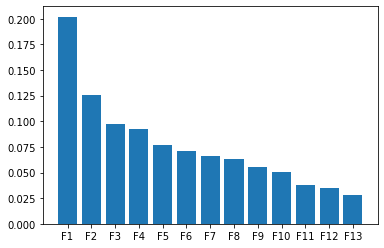

In [0]:
# Plotting 
df = pd.read_csv('/content/drive/My Drive/Heart/heart_train.csv')
del df['index']
del df['target']
xplt = np.array(df.columns)
plt.bar(xplt,pca.explained_variance_ratio_)
plt.show()

# **Machine Learning**

## 1 . **KNearestNeighboors**


In [0]:
# Fitting Model with k = 3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train_scaled , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
# Prediction
y_pred = clf.predict(x_test_scaled)

In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
print('Validation Accuracy : {}'.format(accuracy_score(y_test, y_pred) * 100))

Validation Accuracy : 75.51020408163265


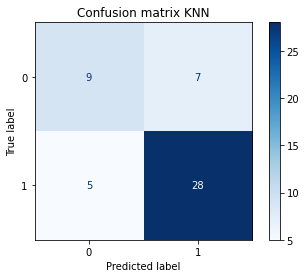

In [0]:
# Confusion Matrix
labels = np.unique(y_test)
disp = plot_confusion_matrix(clf, x_test_scaled, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix KNN')
plt.show()

## 2 . **Support Vector Machine**

In [0]:
from sklearn.svm import SVC
# Fitting Model
clf = SVC()
clf.fit(x_train_scaled , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Prediction
y_pred = clf.predict(x_test_scaled)


In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
print('Validation Accuracy : {}'.format(accuracy_score(y_test, y_pred) * 100))

Validation Accuracy : 79.59183673469387


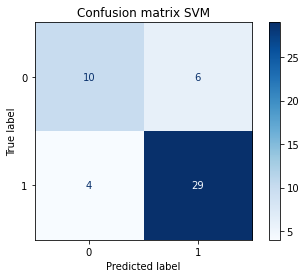

In [0]:
# Confusion Matrix
labels = np.unique(y_test)
disp = plot_confusion_matrix(clf, x_test_scaled, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix SVM')
plt.show()

## 3 . **Random Forest**


In [0]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Model
clf  = RandomForestClassifier()
clf.fit(x_train_scaled , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Prediction
y_pred = clf.predict(x_test_scaled)

In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
print('Validation Accuracy : {}'.format(accuracy_score(y_test, y_pred) * 100))

Validation Accuracy : 77.55102040816327


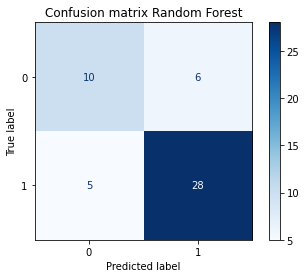

In [0]:
# Confusion Matrix
labels = np.unique(y_test)
disp = plot_confusion_matrix(clf, x_test_scaled, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix Random Forest')
plt.show()

## 4 . **RandomForest + Adaboost**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
# Fitting Model
clf  = RandomForestClassifier()
clf.fit(x_train_scaled , y_train)
btd = AdaBoostClassifier(clf,
                         algorithm="SAMME",
                         n_estimators=20, random_state=1
                          )
btd.fit(x_train_scaled , y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                         

In [0]:
# Prediction
y_pred = btd.predict(x_test_scaled)

In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
print('Validation Accuracy : {}'.format(accuracy_score(y_test, y_pred) * 100))

Validation Accuracy : 77.55102040816327


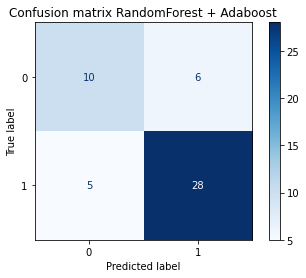

In [0]:
# Confusion Matrix
labels = np.unique(y_test)
disp = plot_confusion_matrix(btd, x_test_scaled, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix RandomForest + Adaboost')
plt.show()

## 5 . **Logisic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
# Fitting Model
clf = LogisticRegression()
clf.fit(x_train_scaled , y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Prediction
y_pred = clf.predict(x_test_scaled)

In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
print('Validation Accuracy : {}'.format(accuracy_score(y_test, y_pred) * 100))

Validation Accuracy : 79.59183673469387


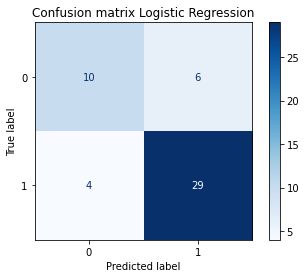

In [0]:
# Confusion Matrix
labels = np.unique(y_test)
disp = plot_confusion_matrix(clf, x_test_scaled, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix Logistic Regression')
plt.show()

## 6 . **Logistic Regression + Adaboost**

In [0]:
# Fitting Model
clf  = LogisticRegression()
clf.fit(x_train_scaled , y_train)
btd = AdaBoostClassifier(clf,
                         algorithm="SAMME",
                         n_estimators=200, random_state=0
                          )
btd.fit(x_train_scaled , y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=200, random_state=0)

In [0]:
# Prediction
y_pred = btd.predict(x_test_scaled)

In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
print('Validation Accuracy : {}'.format(accuracy_score(y_test, y_pred) * 100))

Validation Accuracy : 81.63265306122449


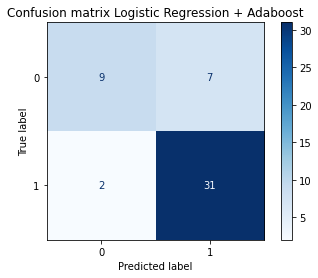

In [0]:
# Confusion Matrix
labels = np.unique(y_test)
disp = plot_confusion_matrix(btd, x_test_scaled, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix Logistic Regression + Adaboost')
plt.show()

## 7 . **Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier
# Fitting Model
clf  = DecisionTreeClassifier()
clf.fit(x_train_scaled , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# Prediction
y_pred = btd.predict(x_test_scaled)

In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
print('Validation Accuracy : {}'.format(accuracy_score(y_test, y_pred) * 100))

Validation Accuracy : 81.63265306122449


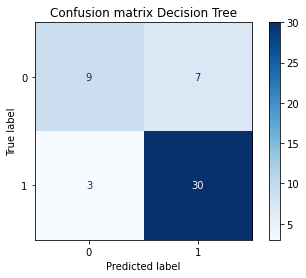

In [0]:
# Confusion Matrix
labels = np.unique(y_test)
disp = plot_confusion_matrix(clf, x_test_scaled, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix Decision Tree')
plt.show()

# **Neural Network**


In [0]:
# Initialize Model and Layers
classifier      = Sequential()
classifier.add(Dense(7 , init='uniform' , activation= 'sigmoid' , input_shape=(13,)))
classifier.add(Dense(7 , init='uniform' , activation= 'sigmoid' ))
classifier.add(Dense(1 , init='uniform' , activation= 'sigmoid' ))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="sigmoid", input_shape=(13,), kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="sigmoid", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [0]:
# Compile 
classifier.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])
# Fitting ANN to Training set
classifier.fit(x_train_scaled , y_train , batch_size=10 , nb_epoch=200, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 154 samples, validate on 39 samples
Epoch 1/200
154/154 [==============================] - 0s 781us/step - loss: 0.6938 - accuracy: 0.4675 - val_loss: 0.6925 - val_accuracy: 0.5897
Epoch 2/200
154/154 [==============================] - 0s 144us/step - loss: 0.6932 - accuracy: 0.5390 - val_loss: 0.6938 - val_accuracy: 0.4103
Epoch 3/200
154/154 [==============================] - 0s 156us/step - loss: 0.6927 - accuracy: 0.5325 - val_loss: 0.6953 - val_accuracy: 0.4103
Epoch 4/200
154/154 [==============================] - 0s 159us/step - loss: 0.6924 - accuracy: 0.5325 - val_loss: 0.6968 - val_accuracy: 0.4103
Epoch 5/200
154/154 [==============================] - 0s 151us/step - loss: 0.6921 - accuracy: 0.5325 - val_loss: 0.6965 - val_accuracy: 0.4103
Epoch 6/200
154/154 [==============================] - 0s 176us/step - loss: 0.6917 - accuracy: 0.5325 - val_loss: 0.6984 - val_accuracy: 0.4103
Epoch 7/200
154/154 [==============================] - 0s 146us/step - loss: 0.6912 -

In [0]:
# Prediction
y_pred  = classifier.predict(x_test_scaled)

In [0]:
# Calculate  Validation accuracy
from sklearn.metrics import accuracy_score
final = []
for i in y_pred:
    if i >= 0.5:
        final.append(1)
    else:
        final.append(0)

print('Validation Accuracy : {}'.format(accuracy_score(y_test, final) * 100))

Validation Accuracy : 79.59183673469387
